In [24]:
import matplotlib.pyplot as plt
import neptune
import pandas as pd
import seaborn as sns
from neptunecontrib.api.utils import get_pickled_artifact

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize': [12, 8]})
plt.style.use('seaborn-whitegrid')


session = neptune.sessions.Session()
project = session.get_project('neptune-ml/binary-classification-metrics')

In [2]:
exp = project.get_experiments(id=['BIN-101'])[0]
exp

Experiment(BIN-101)

In [3]:
y_test, y_test_pred = get_pickled_artifact(exp, 'test_predictions.pkl')

(0.0, 1.0)

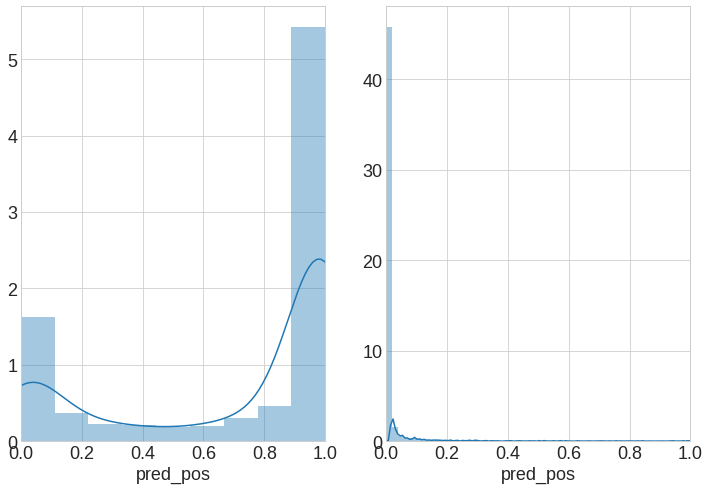

In [25]:
preds = pd.DataFrame(y_test_pred, columns=['pred_neg','pred_pos'])
preds['ground_truth'] = y_test

preds_pos_tp = preds[preds['ground_truth']==1]['pred_pos']
preds_neg_tn = preds[preds['ground_truth']==0]['pred_pos']

fig, axs = plt.subplots(1,2)
sns.distplot(preds_pos_tp, ax=axs[0])
sns.distplot(preds_neg_tn, ax=axs[1])
axs[0].set_xlim([0.0, 1.0])
axs[1].set_xlim([0.0, 1.0])

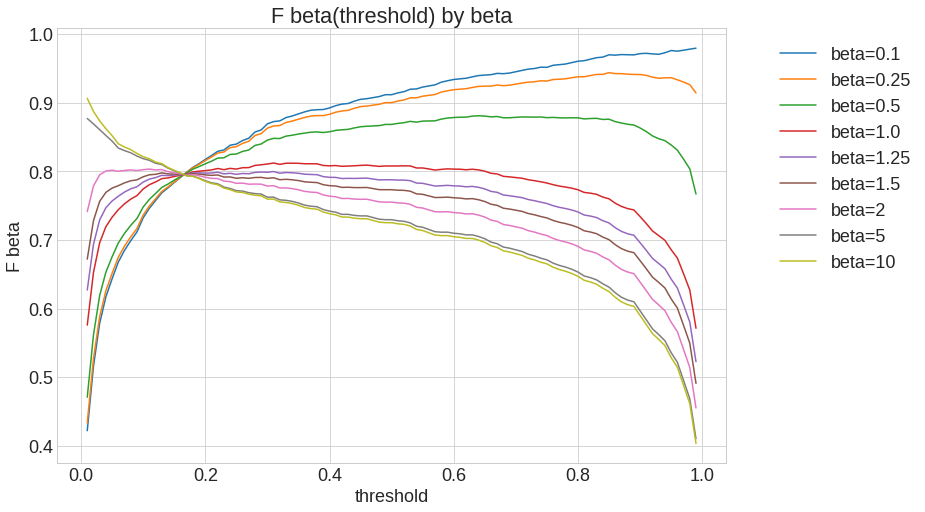

In [26]:
import sklearn.metrics as sk_metrics
    
def f_beta_by_threshold(y_true, y_pred_pos, beta, thres_nr=100):
    thresholds = [i / thres_nr for i in range(1, thres_nr, 1)]

    f_scores = []
    for thres in thresholds:
        y_pred_class = y_pred_pos > thres
        score = sk_metrics.fbeta_score(y_true, y_pred_class, beta=beta)
        f_scores.append(score)

    return thresholds, f_scores

betas = [0.1, 0.25, 0.5, 1.0, 1.25, 1.5, 2, 5, 10]

fig, ax = plt.subplots()
for beta in betas:
    thresholds, scores = f_beta_by_threshold(y_test, y_test_pred[:, 1], beta)
    ax.plot(thresholds, scores, label='beta={}'.format(beta))
    ax.set_title('F beta(threshold) by beta')
    ax.set_xlabel('threshold')
    ax.set_ylabel('F beta')
    ax.legend(loc='right', bbox_to_anchor=(1.3,0.7))
plt.show()